In [68]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

data_path = Path("../data/")   # full path to the HEF folder

train_df = pd.read_csv(data_path / "mimic_train_HEF.csv", low_memory=False)
test_df  = pd.read_csv(data_path / "mimic_test_HEF.csv",  low_memory=False)

train_df.shape, test_df.shape

((20885, 44), (5221, 39))

In [66]:
# exclude the columns we plan to drop
drop_cols = ['DISCHTIME', 'DEATHTIME', 'DOD', 'LOS']

train_df.shape

(20885, 40)

In [70]:
target_col = 'HOSPITAL_EXPIRE_FLAG'

# --- 3. Create X (features) and y (target)
X = train_df.drop(columns=drop_cols + [target_col], errors='ignore')
y = train_df[target_col]

In [59]:
train_df.describe()

,HOSPITAL_EXPIRE_FLAG,subject_id,hadm_id,icustay_id,HeartRate_Min,HeartRate_Max,HeartRate_Mean,SysBP_Min,SysBP_Max,SysBP_Mean,...,TempC_Min,TempC_Max,TempC_Mean,SpO2_Min,SpO2_Max,SpO2_Mean,Glucose_Min,Glucose_Max,Glucose_Mean,Diff
count,20885.000000,20885.000000,20885.000000,20885.000000,18698.000000,18698.000000,18698.000000,18677.000000,18677.000000,18677.000000,...,18388.000000,18388.000000,18388.000000,18682.000000,18682.000000,18682.000000,20632.000000,20632.000000,20632.000000,20885.000000
mean,0.112282,58950.496098,150082.402298,250202.495523,69.705904,105.239801,85.180250,91.110564,150.725920,119.145423,...,36.051208,37.428781,36.751717,91.007494,99.555883,96.866685,106.781975,182.129604,138.856428,-51617.069830
std,0.315720,25299.439535,28898.479845,28909.806302,14.869840,20.922613,15.318208,17.532534,23.833793,16.701503,...,0.732124,0.799897,0.603476,7.399390,1.159792,2.333108,35.178811,92.665603,44.933145,10686.395846
min,0.000000,23.000000,100001.000000,200001.000000,2.000000,39.000000,34.714286,5.000000,46.000000,46.000000,...,15.000000,30.800000,30.666667,1.000000,57.000000,47.666667,2.000000,42.000000,42.000000,-72740.274440
25%,0.000000,41132.000000,125157.000000,225153.000000,60.000000,90.000000,74.272727,81.000000,134.000000,107.100000,...,35.666667,36.944444,36.388889,90.000000,100.000000,95.812500,86.000000,126.000000,110.750000,-60864.454110
50%,0.000000,60441.000000,150152.000000,250452.000000,69.000000,103.000000,84.131183,90.000000,148.000000,116.901961,...,36.111111,37.333333,36.731481,92.000000,100.000000,97.142857,102.000000,161.000000,128.666667,-51561.703460
75%,0.000000,80286.000000,175017.000000,275303.000000,79.000000,118.000000,95.185588,101.000000,164.000000,129.465116,...,36.500000,37.888889,37.092593,94.000000,100.000000,98.346154,121.000000,206.000000,154.578571,-42327.560030
max,1.000000,99999.000000,199999.000000,299998.000000,141.000000,280.000000,163.875000,181.000000,323.000000,202.172414,...,40.100000,42.000000,40.238333,100.000000,100.000000,100.000000,563.000000,2440.000000,771.900000,-32157.494580


In [49]:
train_df.isna().sum()
# has missing values in 25 columns and no missing values in 15 columns

HOSPITAL_EXPIRE_FLAG       0
subject_id                 0
hadm_id                    0
icustay_id                 0
HeartRate_Min           2187
HeartRate_Max           2187
HeartRate_Mean          2187
SysBP_Min               2208
SysBP_Max               2208
SysBP_Mean              2208
DiasBP_Min              2209
DiasBP_Max              2209
DiasBP_Mean             2209
MeanBP_Min              2186
MeanBP_Max              2186
MeanBP_Mean             2186
RespRate_Min            2189
RespRate_Max            2189
RespRate_Mean           2189
TempC_Min               2497
TempC_Max               2497
TempC_Mean              2497
SpO2_Min                2203
SpO2_Max                2203
SpO2_Mean               2203
Glucose_Min              253
Glucose_Max              253
Glucose_Mean             253
GENDER                     0
DOB                        0
ADMITTIME                  0
Diff                       0
ADMISSION_TYPE             0
INSURANCE                  0
RELIGION      

## target balance

HOSPITAL_EXPIRE_FLAG
0    88.771846
1    11.228154
Name: proportion, dtype: float64


<Axes: title={'center': 'Target distribution (HOSPITAL_EXPIRE_FLAG)'}, xlabel='HOSPITAL_EXPIRE_FLAG'>

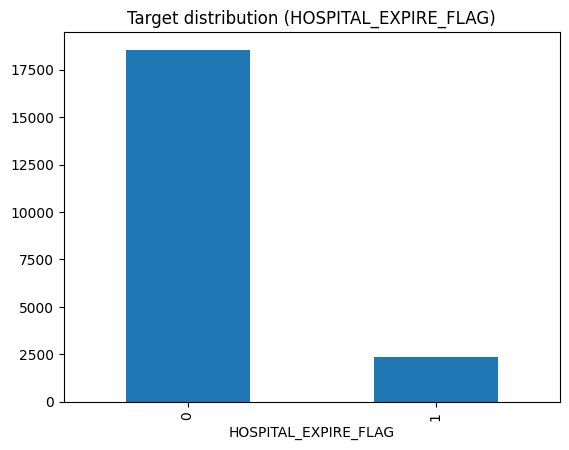

In [50]:
# Check target distribution
print(y.value_counts(normalize=True) * 100)
y.value_counts().plot(kind='bar', title='Target distribution (HOSPITAL_EXPIRE_FLAG)')


✅ Conclusion:

Distribution is realistic and fine.

Just keep in mind: treat it as imbalanced classification.

## missing values

In [52]:
# Count missing values and sort
missing = train_df.isna().sum().sort_values(ascending=False)

# Convert to % of total rows
missing_percent = (missing / len(train_df)) * 100

# Combine into one table for clarity
missing_df = pd.DataFrame({
    'missing_count': missing,
    'missing_percent': missing_percent
})

# Show only columns with missing values
missing_df[missing_df['missing_count'] > 0].head(30)


,missing_count,missing_percent
TempC_Mean,2497,11.955949
TempC_Min,2497,11.955949
TempC_Max,2497,11.955949
DiasBP_Max,2209,10.576969
DiasBP_Min,2209,10.576969
DiasBP_Mean,2209,10.576969
SysBP_Min,2208,10.572181
SysBP_Max,2208,10.572181
SysBP_Mean,2208,10.572181
SpO2_Max,2203,10.548240


we’ll handle these safely with imputation (like filling median values).

## identify numeric and categorical columns

In [19]:
features = train_df

# check feature types
numeric_cols = features.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = features.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Numeric columns: {len(numeric_cols)}")
print(f"Categorical columns: {len(categorical_cols)}")
print("Actual categorical columns:", categorical_cols[:15])


Numeric columns: 29
Categorical columns: 11
Actual categorical columns: ['GENDER', 'DOB', 'ADMITTIME', 'ADMISSION_TYPE', 'INSURANCE', 'RELIGION', 'MARITAL_STATUS', 'ETHNICITY', 'DIAGNOSIS', 'ICD9_diagnosis', 'FIRST_CAREUNIT']


| Column             | Type                | What it represents                           | What we’ll likely do                                                                     |
| ------------------ | ------------------- | -------------------------------------------- | ---------------------------------------------------------------------------------------- |
| **GENDER**         | Nominal (M/F)       | straightforward binary                       | ✅ Keep — encode as 0/1 automatically                                                     |
| **DOB**            | Date                | birth date → strongly related to patient age | ⚠️ We *can’t* use DOB directly, but we can **convert it to age** if `ADMITTIME` is valid |
| **ADMITTIME**      | Date                | when patient admitted                        | ⚠️ Time-based — usually drop unless we extract something like *hour* or *day of week*    |
| **ADMISSION_TYPE** | Nominal             | e.g., *EMERGENCY*, *ELECTIVE*                | ✅ Keep — encode                                                                          |
| **INSURANCE**      | Nominal             | e.g., *Medicare*, *Private*, etc.            | ✅ Keep — encode                                                                          |
| **RELIGION**       | Nominal             | may have many categories                     | ⚠️ Keep only if not too sparse                                                           |
| **MARITAL_STATUS** | Nominal             | e.g., *Married*, *Single*                    | ✅ Keep — encode                                                                          |
| **ETHNICITY**      | Nominal             | e.g., *White*, *Black*, etc.                 | ⚠️ Could be high-cardinality — keep but check counts                                     |
| **DIAGNOSIS**      | Text / freeform     | very high cardinality (many unique strings)  | ❌ Probably drop or simplify                                                              |
| **ICD9_diagnosis** | Categorical (codes) | numeric-ish but categorical                  | ⚠️ Maybe group by first 3 digits or drop if too sparse                                   |
| **FIRST_CAREUNIT** | Nominal             | e.g., *MICU*, *SICU*, etc.                   | ✅ Keep — small number of categories                                                      |


In [20]:
# Check for text-heavy categorical columns
# To confirm which of these are truly text-heavy (and maybe too unique)
for col in categorical_cols:
    n_unique = features[col].nunique()
    print(f"{col:20s}: {n_unique}")


GENDER              : 2
DOB                 : 14007
ADMITTIME           : 19714
ADMISSION_TYPE      : 3
INSURANCE           : 5
RELIGION            : 17
MARITAL_STATUS      : 7
ETHNICITY           : 41
DIAGNOSIS           : 6193
ICD9_diagnosis      : 1853
FIRST_CAREUNIT      : 5


| Column             | # Unique | Meaning / Usefulness       | Recommendation                                                      |
| ------------------ | -------- | -------------------------- | ------------------------------------------------------------------- |
| **GENDER**         | 2        | clean binary               | ✅ Keep — perfect for modeling                                       |
| **DOB**            | 14 007   | almost unique per patient  | ❌ Drop — too unique, not a usable feature (you can’t learn from it) |
| **ADMITTIME**      | 19 714   | nearly unique (timestamps) | ❌ Drop — too granular and leaks timing info                         |
| **ADMISSION_TYPE** | 3        | small, clean categories    | ✅ Keep — encode                                                     |
| **INSURANCE**      | 5        | manageable                 | ✅ Keep — encode                                                     |
| **RELIGION**       | 17       | somewhat sparse            | ⚠️ Keep for now; may drop later if it adds noise                    |
| **MARITAL_STATUS** | 7        | fine                       | ✅ Keep — encode                                                     |
| **ETHNICITY**      | 41       | high cardinality           | ⚠️ Possibly keep (may collapse rare ones into “Other”)              |
| **DIAGNOSIS**      | 6 193    | huge                       | ❌ Drop — far too many unique strings                                |
| **ICD9_diagnosis** | 1 853    | very large                 | ⚠️ Maybe drop or simplify (e.g. use first 3 digits)                 |
| **FIRST_CAREUNIT** | 5        | clean and useful           | ✅ Keep — encode                                                     |


In [21]:
# simplest and safest plan is:

# Drop or simplify these
drop_categoricals = [
    "DOB", "ADMITTIME", "DIAGNOSIS", "ICD9_diagnosis"
]

# Keep & encode these
use_categoricals = [
    "GENDER", "ADMISSION_TYPE", "INSURANCE",
    "RELIGION", "MARITAL_STATUS", "ETHNICITY", "FIRST_CAREUNIT"
]

## correlation / feature insight step

In [24]:
num_df = train_df[numeric_cols]

# compute correlations and extract target column as a Series explicitly
corr_matrix = num_df.corr(numeric_only=True)
corrs = corr_matrix['HOSPITAL_EXPIRE_FLAG']

# convert to Series if needed (some versions return DataFrame)
if isinstance(corrs, pd.DataFrame):
    corrs = corrs.squeeze()

corrs = corrs.sort_values(ascending=False)

corrs.head(40)


HOSPITAL_EXPIRE_FLAG    1.000000
RespRate_Mean           0.175122
RespRate_Max            0.135877
HeartRate_Max           0.129469
HeartRate_Mean          0.110773
Glucose_Mean            0.105205
Glucose_Max             0.084702
RespRate_Min            0.072560
Glucose_Min             0.064290
MeanBP_Max              0.014403
HeartRate_Min           0.006973
hadm_id                 0.001671
Diff                   -0.000994
subject_id             -0.008040
icustay_id             -0.010380
DiasBP_Max             -0.022246
SysBP_Max              -0.028490
TempC_Max              -0.042721
SpO2_Max               -0.049621
DiasBP_Mean            -0.099773
TempC_Mean             -0.110223
MeanBP_Mean            -0.113767
SysBP_Mean             -0.128680
TempC_Min              -0.136591
DiasBP_Min             -0.138257
SpO2_Mean              -0.156872
MeanBP_Min             -0.176074
SysBP_Min              -0.194698
SpO2_Min               -0.234060
Name: HOSPITAL_EXPIRE_FLAG, dtype: float64

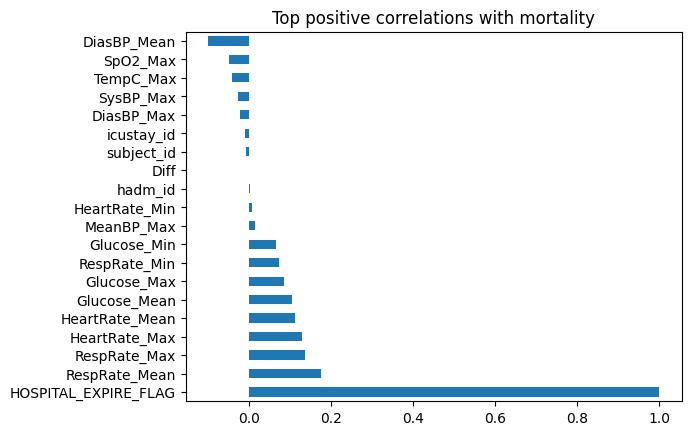

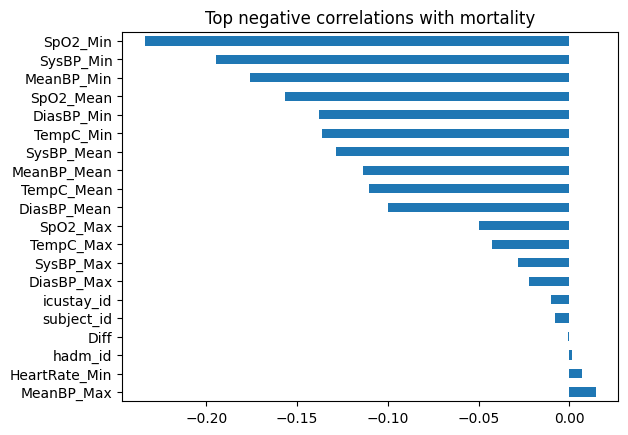

In [25]:
import matplotlib.pyplot as plt

corrs.head(20).plot(kind='barh', title='Top positive correlations with mortality')
plt.show()

corrs.tail(20).plot(kind='barh', title='Top negative correlations with mortality')
plt.show()


## outliers

In [26]:
# look at key percentiles instead of just min/max
train_df[numeric_cols].describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99]).T.round(2)


,count,mean,std,min,1%,25%,50%,75%,99%,max
HOSPITAL_EXPIRE_FLAG,20885.0,0.11,0.32,0.00,0.00,0.00,0.00,0.00,1.00,1.00
subject_id,20885.0,58950.50,25299.44,23.00,3097.44,41132.00,60441.00,80286.00,99178.80,99999.00
hadm_id,20885.0,150082.40,28898.48,100001.00,100983.84,125157.00,150152.00,175017.00,199020.60,199999.00
icustay_id,20885.0,250202.50,28909.81,200001.00,201043.88,225153.00,250452.00,275303.00,299045.12,299998.00
HeartRate_Min,18698.0,69.71,14.87,2.00,35.00,60.00,69.00,79.00,108.00,141.00
HeartRate_Max,18698.0,105.24,20.92,39.00,65.97,90.00,103.00,118.00,163.00,280.00
HeartRate_Mean,18698.0,85.18,15.32,34.71,53.50,74.27,84.13,95.19,124.37,163.88
SysBP_Min,18677.0,91.11,17.53,5.00,47.00,81.00,90.00,101.00,137.00,181.00
SysBP_Max,18677.0,150.73,23.83,46.00,105.00,134.00,148.00,164.00,218.00,323.00
SysBP_Mean,18677.0,119.15,16.70,46.00,86.91,107.10,116.90,129.47,164.32,202.17


In [29]:
import numpy as np

def iqr_outlier_fraction(series):
    q1, q3 = np.percentile(series.dropna(), [25, 75])
    iqr = q3 - q1
    lower, upper = q1 - 1.5 * iqr, q3 + 1.5 * iqr
    outliers = ((series < lower) | (series > upper)).sum()
    return outliers / len(series)

for col in numeric_cols[:30]:  # first few just to illustrate
    frac = iqr_outlier_fraction(train_df[col])
    print(f"{col:20s}: {frac:.2%} outliers")


HOSPITAL_EXPIRE_FLAG: 11.23% outliers
subject_id          : 0.00% outliers
hadm_id             : 0.00% outliers
icustay_id          : 0.00% outliers
HeartRate_Min       : 1.54% outliers
HeartRate_Max       : 1.07% outliers
HeartRate_Mean      : 0.69% outliers
SysBP_Min           : 2.87% outliers
SysBP_Max           : 1.57% outliers
SysBP_Mean          : 1.14% outliers
DiasBP_Min          : 2.51% outliers
DiasBP_Max          : 2.40% outliers
DiasBP_Mean         : 1.73% outliers
MeanBP_Min          : 4.63% outliers
MeanBP_Max          : 3.47% outliers
MeanBP_Mean         : 1.76% outliers
RespRate_Min        : 2.18% outliers
RespRate_Max        : 2.02% outliers
RespRate_Mean       : 2.02% outliers
TempC_Min           : 2.08% outliers
TempC_Max           : 2.55% outliers
TempC_Mean          : 2.10% outliers
SpO2_Min            : 6.60% outliers
SpO2_Max            : 20.92% outliers
SpO2_Mean           : 1.83% outliers
Glucose_Min         : 4.29% outliers
Glucose_Max         : 6.44% outliers

| Feature type                                                              | Typical outlier % | What it means                                                                                                           | Action                           |
| ------------------------------------------------------------------------- | ----------------- | ----------------------------------------------------------------------------------------------------------------------- | -------------------------------- |
| **Most vitals (HeartRate, BP, RespRate, TempC)**                          | 1–3 %             | Great ✅ — normal physiological spread, no real issue.                                                                   | Keep as is                       |
| **MeanBP_Min (4.6 %)**, **SpO2_Min (6.6 %)**, **Glucose features (~5 %)** | Moderate          | Reasonable variation; could represent genuinely sick patients.                                                          | Keep; maybe clip later if needed |
| **SpO2_Max (20.9 %)**                                                     | High ⚠️           | That’s a flag — oxygen saturation can’t realistically exceed 100 %, so these are likely **measurement or unit errors**. | Consider capping (Winsorizing)   |
| **ID columns**                                                            | 0 %               | Perfect — they’re unique identifiers (we’ll drop them anyway).                                                          | Drop before modeling             |
| **Target (HOSPITAL_EXPIRE_FLAG)**                                         | 11 % “outliers”   | Not meaningful — that’s just the 11 % of positive cases.                                                                | Ignore                           |


Going trough them one by one


HeartRate

HeartRate_Min: min=2.0, max=141.0


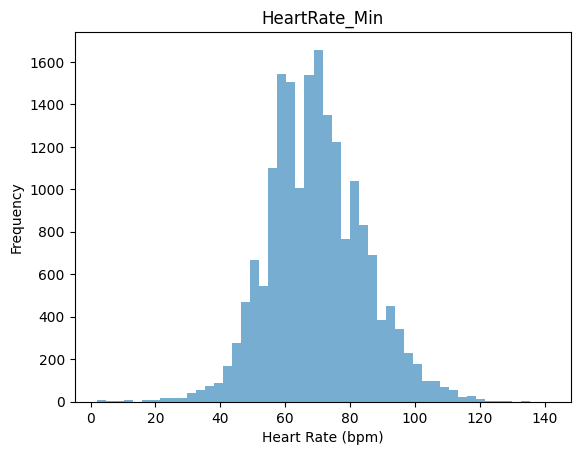

HeartRate_Max: min=39.0, max=280.0


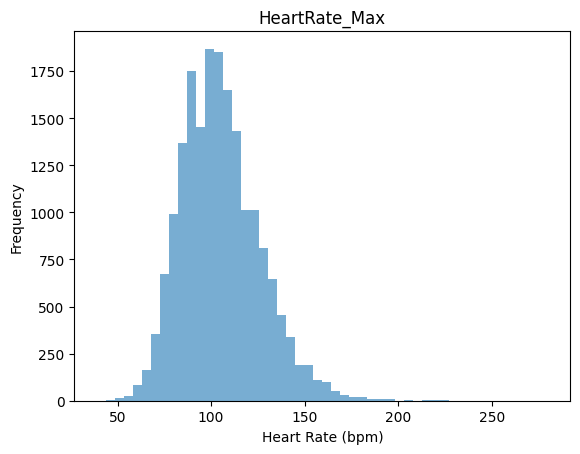

HeartRate_Mean: min=34.7142857142857, max=163.875


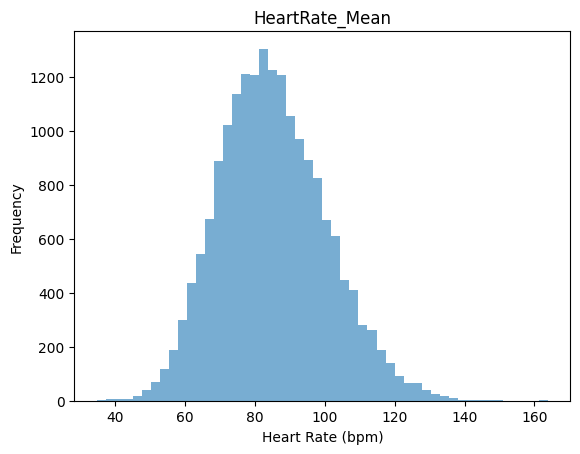

In [71]:
for col in ['HeartRate_Min', 'HeartRate_Max', 'HeartRate_Mean']:
    print(f"{col}: min={X[col].min()}, max={X[col].max()}")
    X[col].plot(kind='hist', bins=50, title=col, alpha=0.6)
    plt.xlabel('Heart Rate (bpm)')
    plt.show()


## Feature creation? 

mss een age feature aanmaken nog

date times fatsoenlijk converten? 